In [1]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
 
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]
    data['num_vehicles'] = 4 #车辆数量
    data['depot'] = 0 #出发点索引
    data['demands'] = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8] #每个地点的需求量
    data['vehicle_capacities'] = [15, 15, 15, 15]#每辆车的容量
    return data
 
data = create_data_model()
print(len(data['distance_matrix']))

17


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches

In [3]:
sheet1=pd.read_excel(r'/home/jesse_chen/anaconda3/A_computer_science/数维B题/Annex1：node＆link.xlsx',sheet_name='Sheet1')
sheet2=pd.read_excel(r'/home/jesse_chen/anaconda3/A_computer_science/数维B题/Annex1：node＆link.xlsx',sheet_name='Sheet2')
nodes=np.array(sheet1)
red=nodes[nodes[:,3]=='red']
blue=nodes[nodes[:,3]=='blue']
lines=np.array(sheet2)
#print(lines[:,1:3].astype('int'))

[[  2   3]
 [  4   5]
 [  7   8]
 ...
 [163 435]
 [435  36]
 [436 435]]


In [4]:
side=0
sidenum=0
for i in range(lines.shape[0]):
    if(nodes[lines[i,1].astype('int')-1,3]!=nodes[lines[i,2].astype('int')-1,3]):
        side+=nodes[lines[i,1].astype('int')-1,2]+nodes[lines[i,2].astype('int')-1,2]
        sidenum+=2
side=side/sidenum


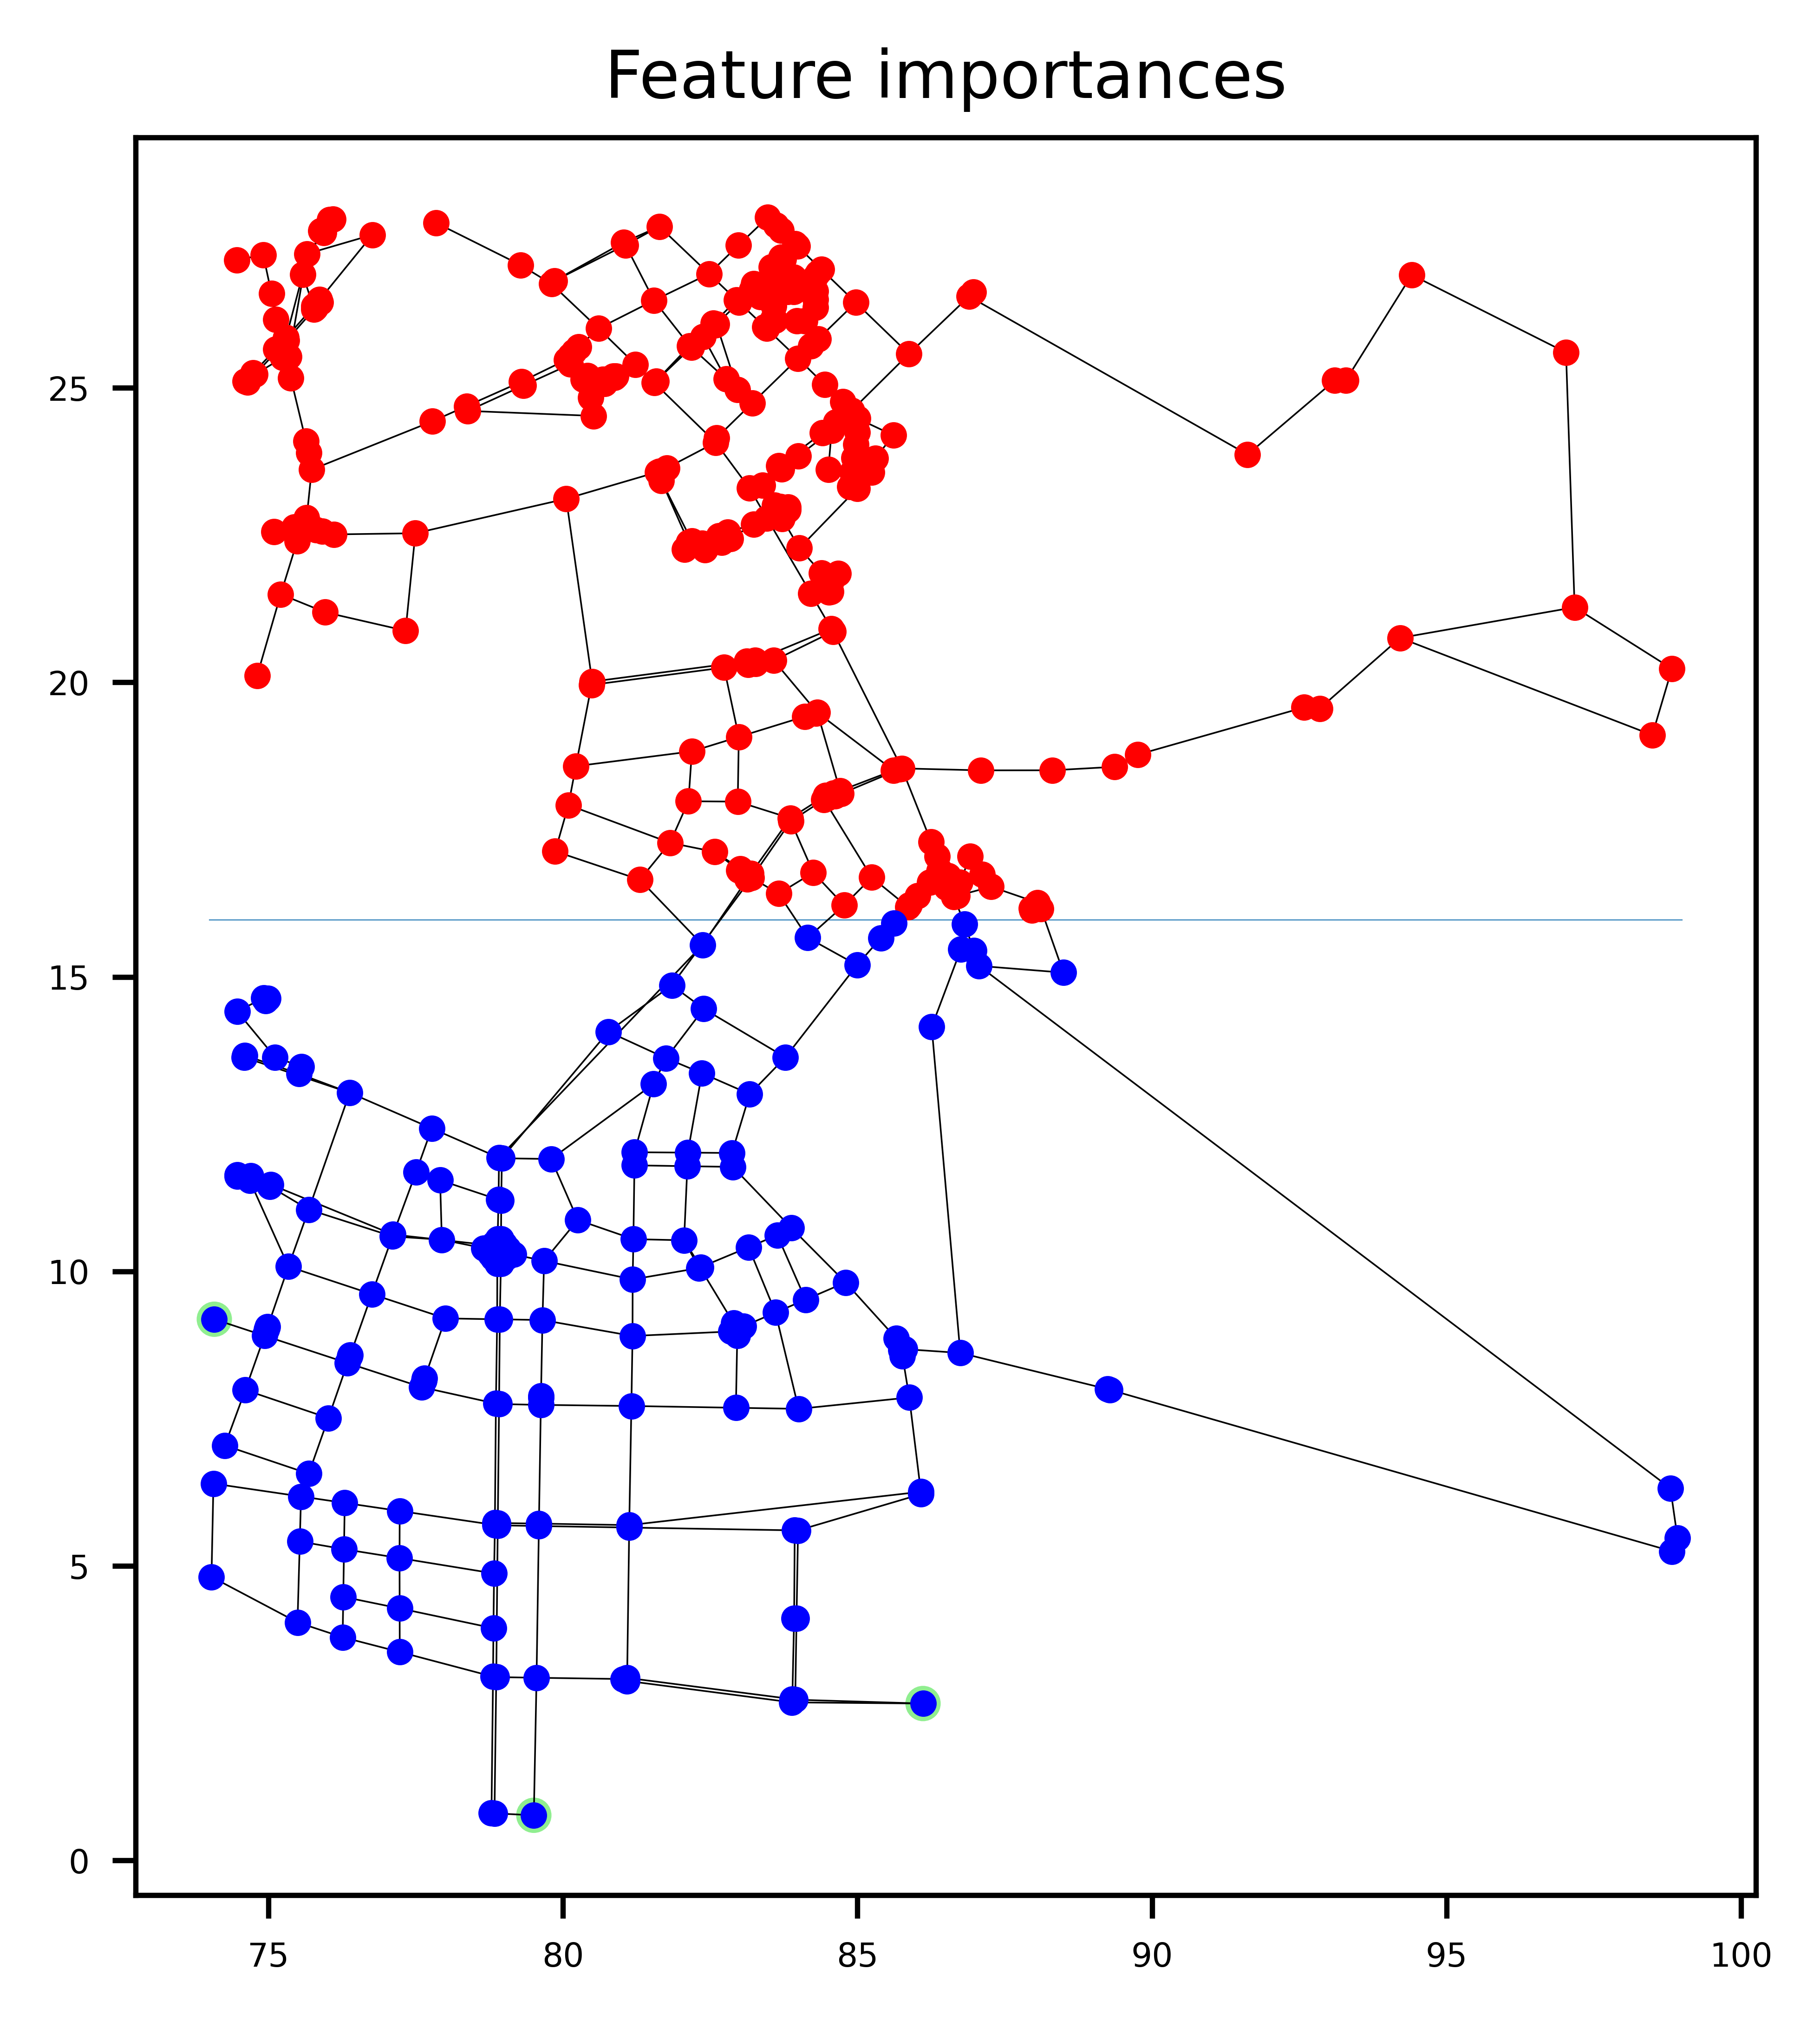

In [9]:
fig,ax=plt.subplots(1,1,dpi=1024)
plt.title("Feature importances", fontsize=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
ax.set_aspect('equal')

ax.plot(np.arange(74,100,step=1),np.full(26,side),'-',linewidth=0.15)

ax.add_artist(patches.Circle((nodes[139,1],nodes[139,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[36,1],nodes[36,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[377,1],nodes[377,2]),radius=0.3,facecolor='lightgreen'))
for i in range(red.shape[0]):
    ax.add_artist(patches.Circle((red[i,1],red[i,2]),radius=0.05+red[i,4]/10,facecolor='red'))
for i in range(blue.shape[0]):
    ax.add_artist(patches.Circle((blue[i,1],blue[i,2]),radius=0.05+blue[i,4]/10,facecolor='blue'))
for i in range(lines.shape[0]):
    ax.plot(nodes[lines[i,1:3].astype('int')-1,1],nodes[lines[i,1:3].astype('int')-1,2],'-',color='black',linewidth=0.25)
ax.plot(red[:,1],red[:,2],'.',color='red')
ax.plot(blue[:,1],blue[:,2],'.',color='blue')
plt.show()

In [10]:
#所有节点连线的平均长度（实际）
average=np.mean(lines[:,3])
print(average)

5.518364510779437


In [11]:
def distance(node1,node2):
    return np.linalg.norm(node1-node2)

In [12]:
def closest_node(node,red_node,blue_node,choose='red'):
    temp=[]
    if(choose=='red'):
        for i in range(red_node.shape[0]):
            temp=np.append(temp,distance(node,red_node[i,1:3]))
    if(choose=='blue'):
        for i in range(blue_node.shape[0]):
            temp=np.append(temp,distance(node,blue_node[i,1:3]))
    return np.argmin(temp),temp
closest_node()

TypeError: closest_node() missing 3 required positional arguments: 'node', 'red_node', and 'blue_node'

In [ ]:
#图上距离比实际距离的平均值

tempp=0
for i in range(lines.shape[0]):
    tempp+=distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3]
    #print(distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3])
ratio=tempp/lines.shape[0]
print(ratio)


0.1491574713360896


In [ ]:
def cost_func(centroids,X,idx,side=side):
    m=X.shape[0]
    a=1
    b=1
    c=1
    d=1
    sum_distance=0
    sum_toside=0
    for i in range(X.shape[0]):
        sum_distance+=np.square(np.linalg.norm(X[i]-centroids[idx[i]]))
        sum_toside+=np.square(X[i,1]-side)
    return a/m*sum_distance+0.01/m*sum_toside


In [ ]:
def draw_line(p1, p2, style="-k", color='black',linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]],"-", color="black",linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', linewidths=1)
    
    # Plot the examples
    #plot_data_points(X, idx)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :],linewidth=0.3)
    
    plt.title("Iteration number %d" %i)

In [ ]:
def kMeans(X,K,max_iters=10,plot_progress=True,side=side,a=1,b=0.1,c=-0.1,choose='red'):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    previous_centroids = centroids
    idx = np.zeros(X.shape[0], dtype=int)
    m, n = X.shape
    
    closest_id,all_distance=0,[]
    
    for i in range(max_iters):
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        #print(" Cost: %f"%cost_func(centroids,X,idx))
        
        # For each example in X, assign it to the closest centroid
        for j in range(m):
            distance=[]
            for k in range(K):
                closest_id,all_distance=closest_node(centroids[k],red,blue,choose=choose)
                index=np.argwhere(all_distance<(2*average*ratio))
                if(choose=='red'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(red[index,4]))
                if(choose=='blue'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(blue[index,4]))
            idx[j]=np.argmin(distance)

        # Optionally plot progress
        if plot_progress:
            if(i==max_iters-1):
                plot_data_points(X, idx)
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, j)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        for k in range(K):   
            points = X[idx == k]
            centroids[k] = np.mean(points, axis = 0)
    print("Cost : %f"%cost_func(centroids,X,idx))
    return centroids,idx
    

In [ ]:
def judge(centroids,idx,K,choose='red'):
    sum=0
    if(choose=='red'):
        for i in range(K):
            sum+=np.sum(1/closest_node(centroids[i],red,blue,choose='red')[1])
    print(sum)

        

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 6.880790


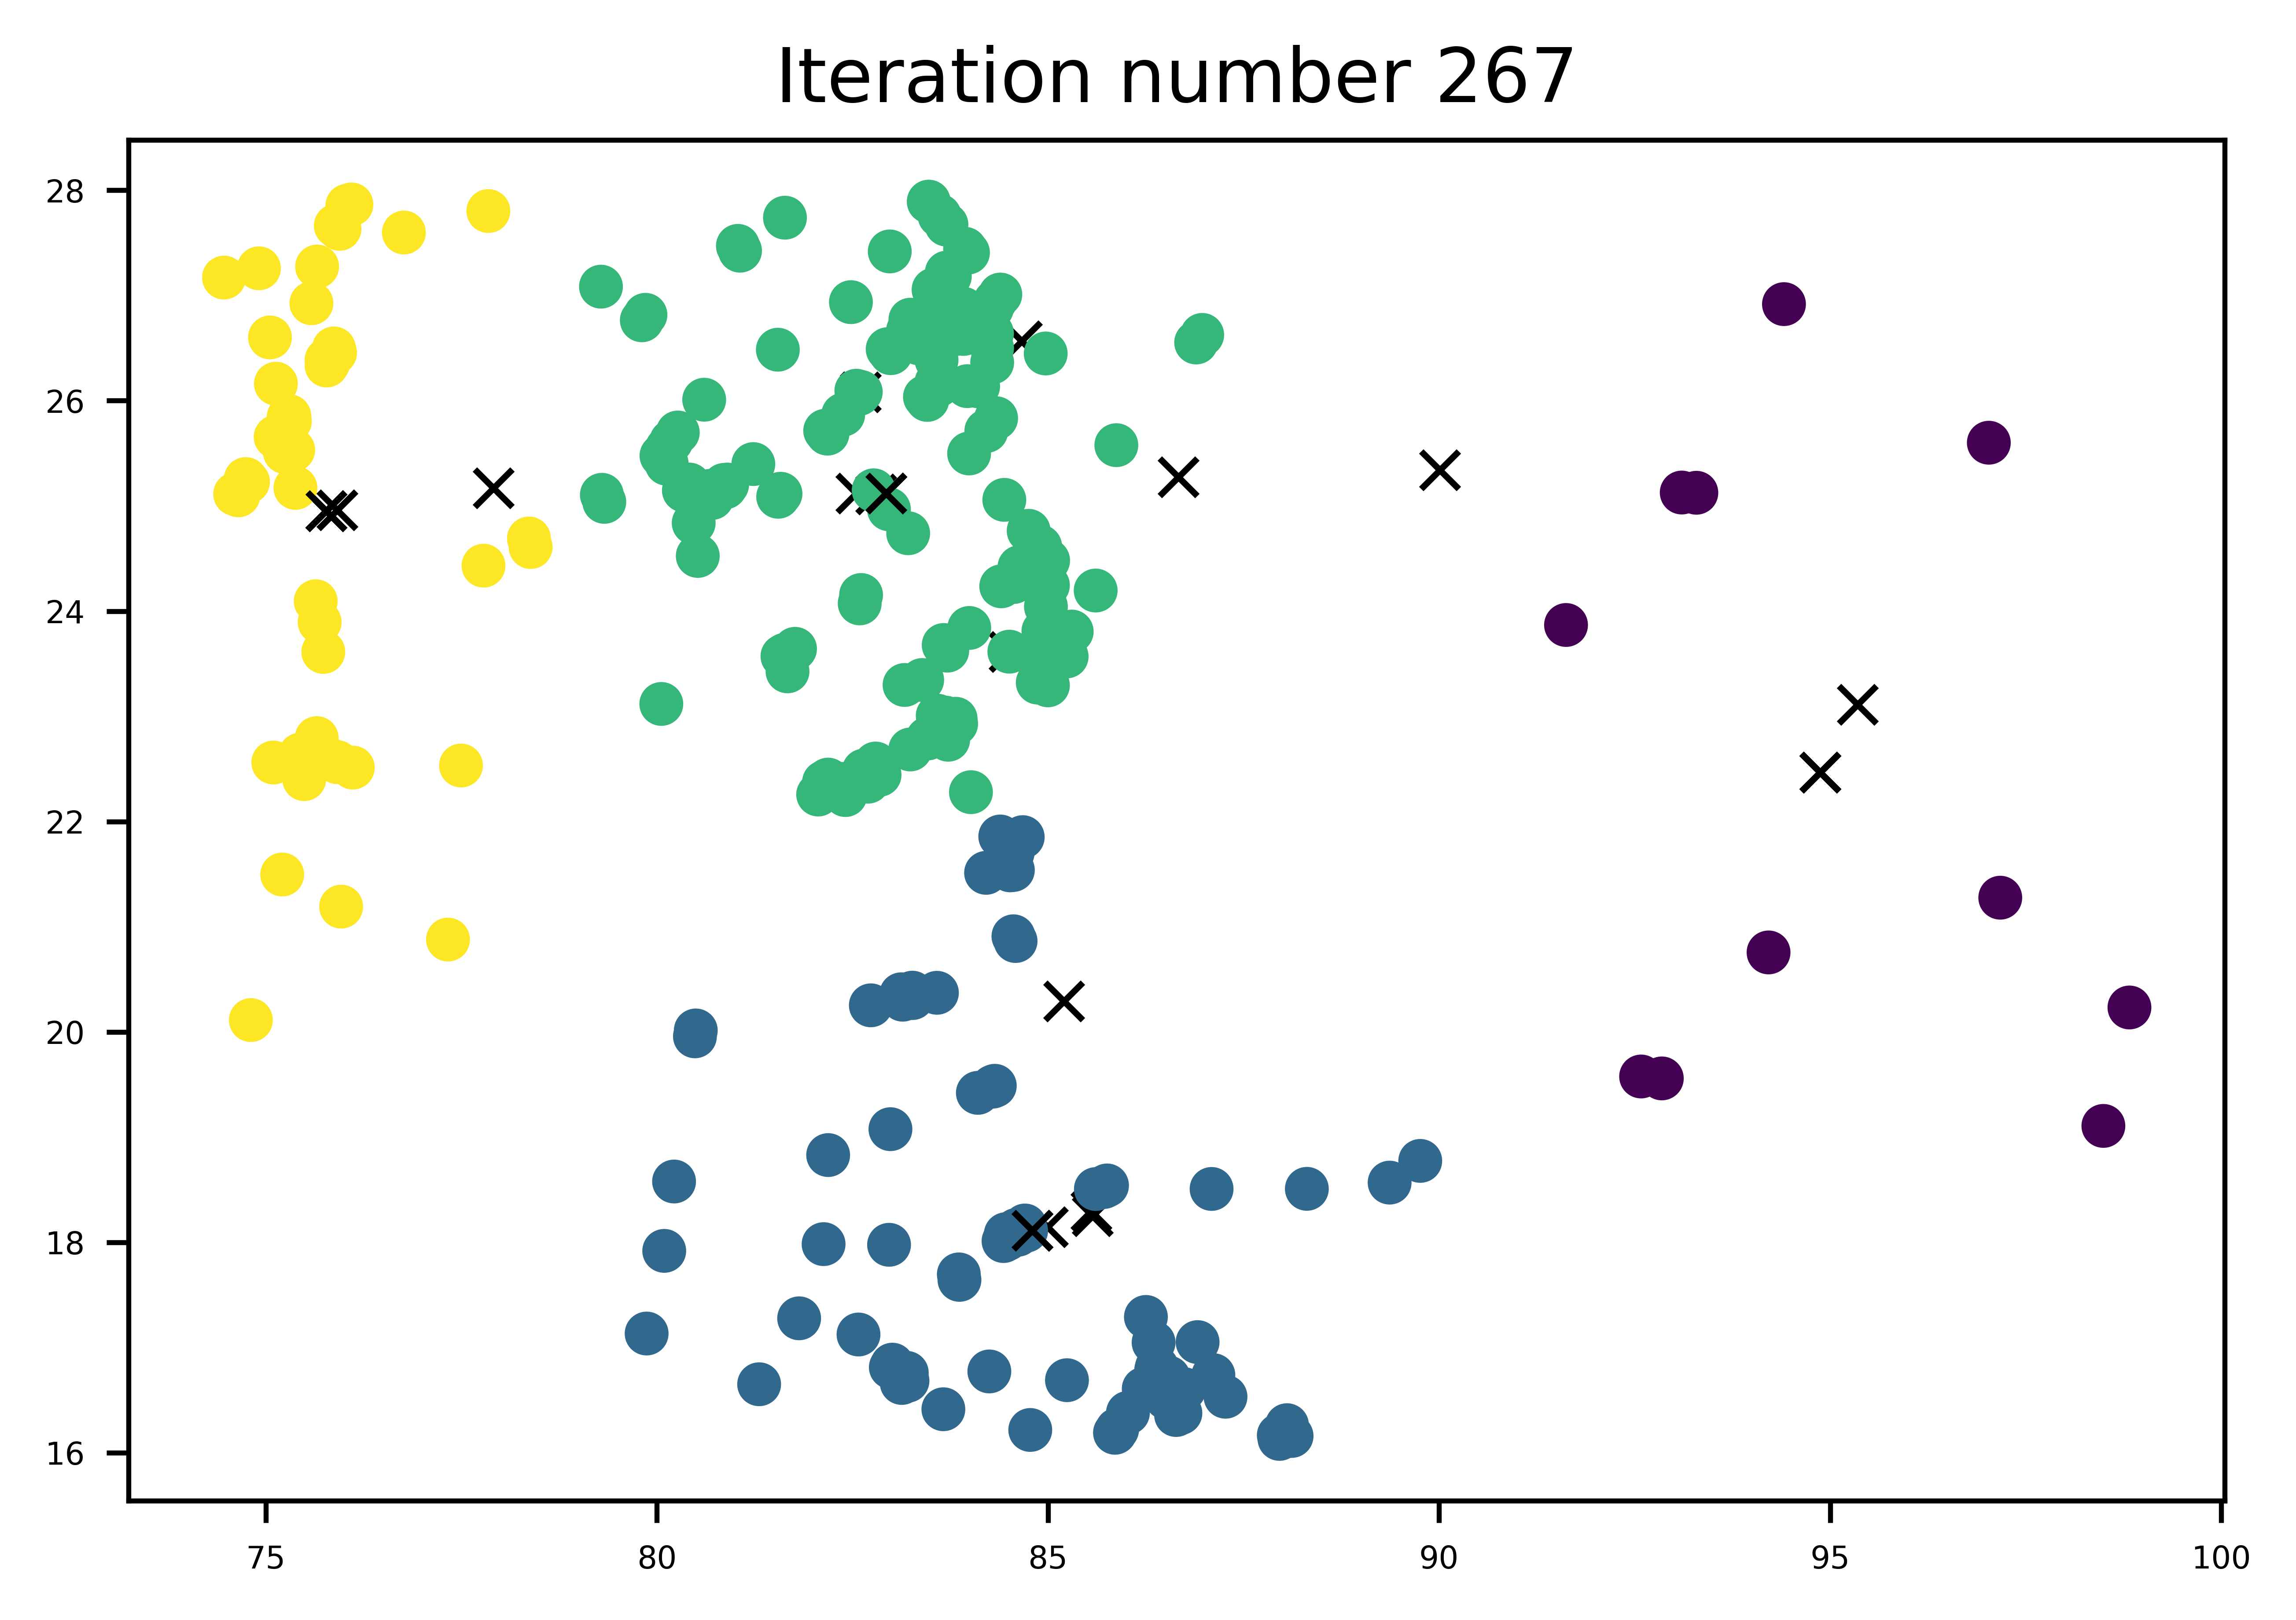

275.0841922787848


In [ ]:
K_red=4
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
red_centroids, red_idx = kMeans(red[:,1:3],K_red,choose='red')
plt.show()
judge(red_centroids, red_idx,K_red)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 12.668008


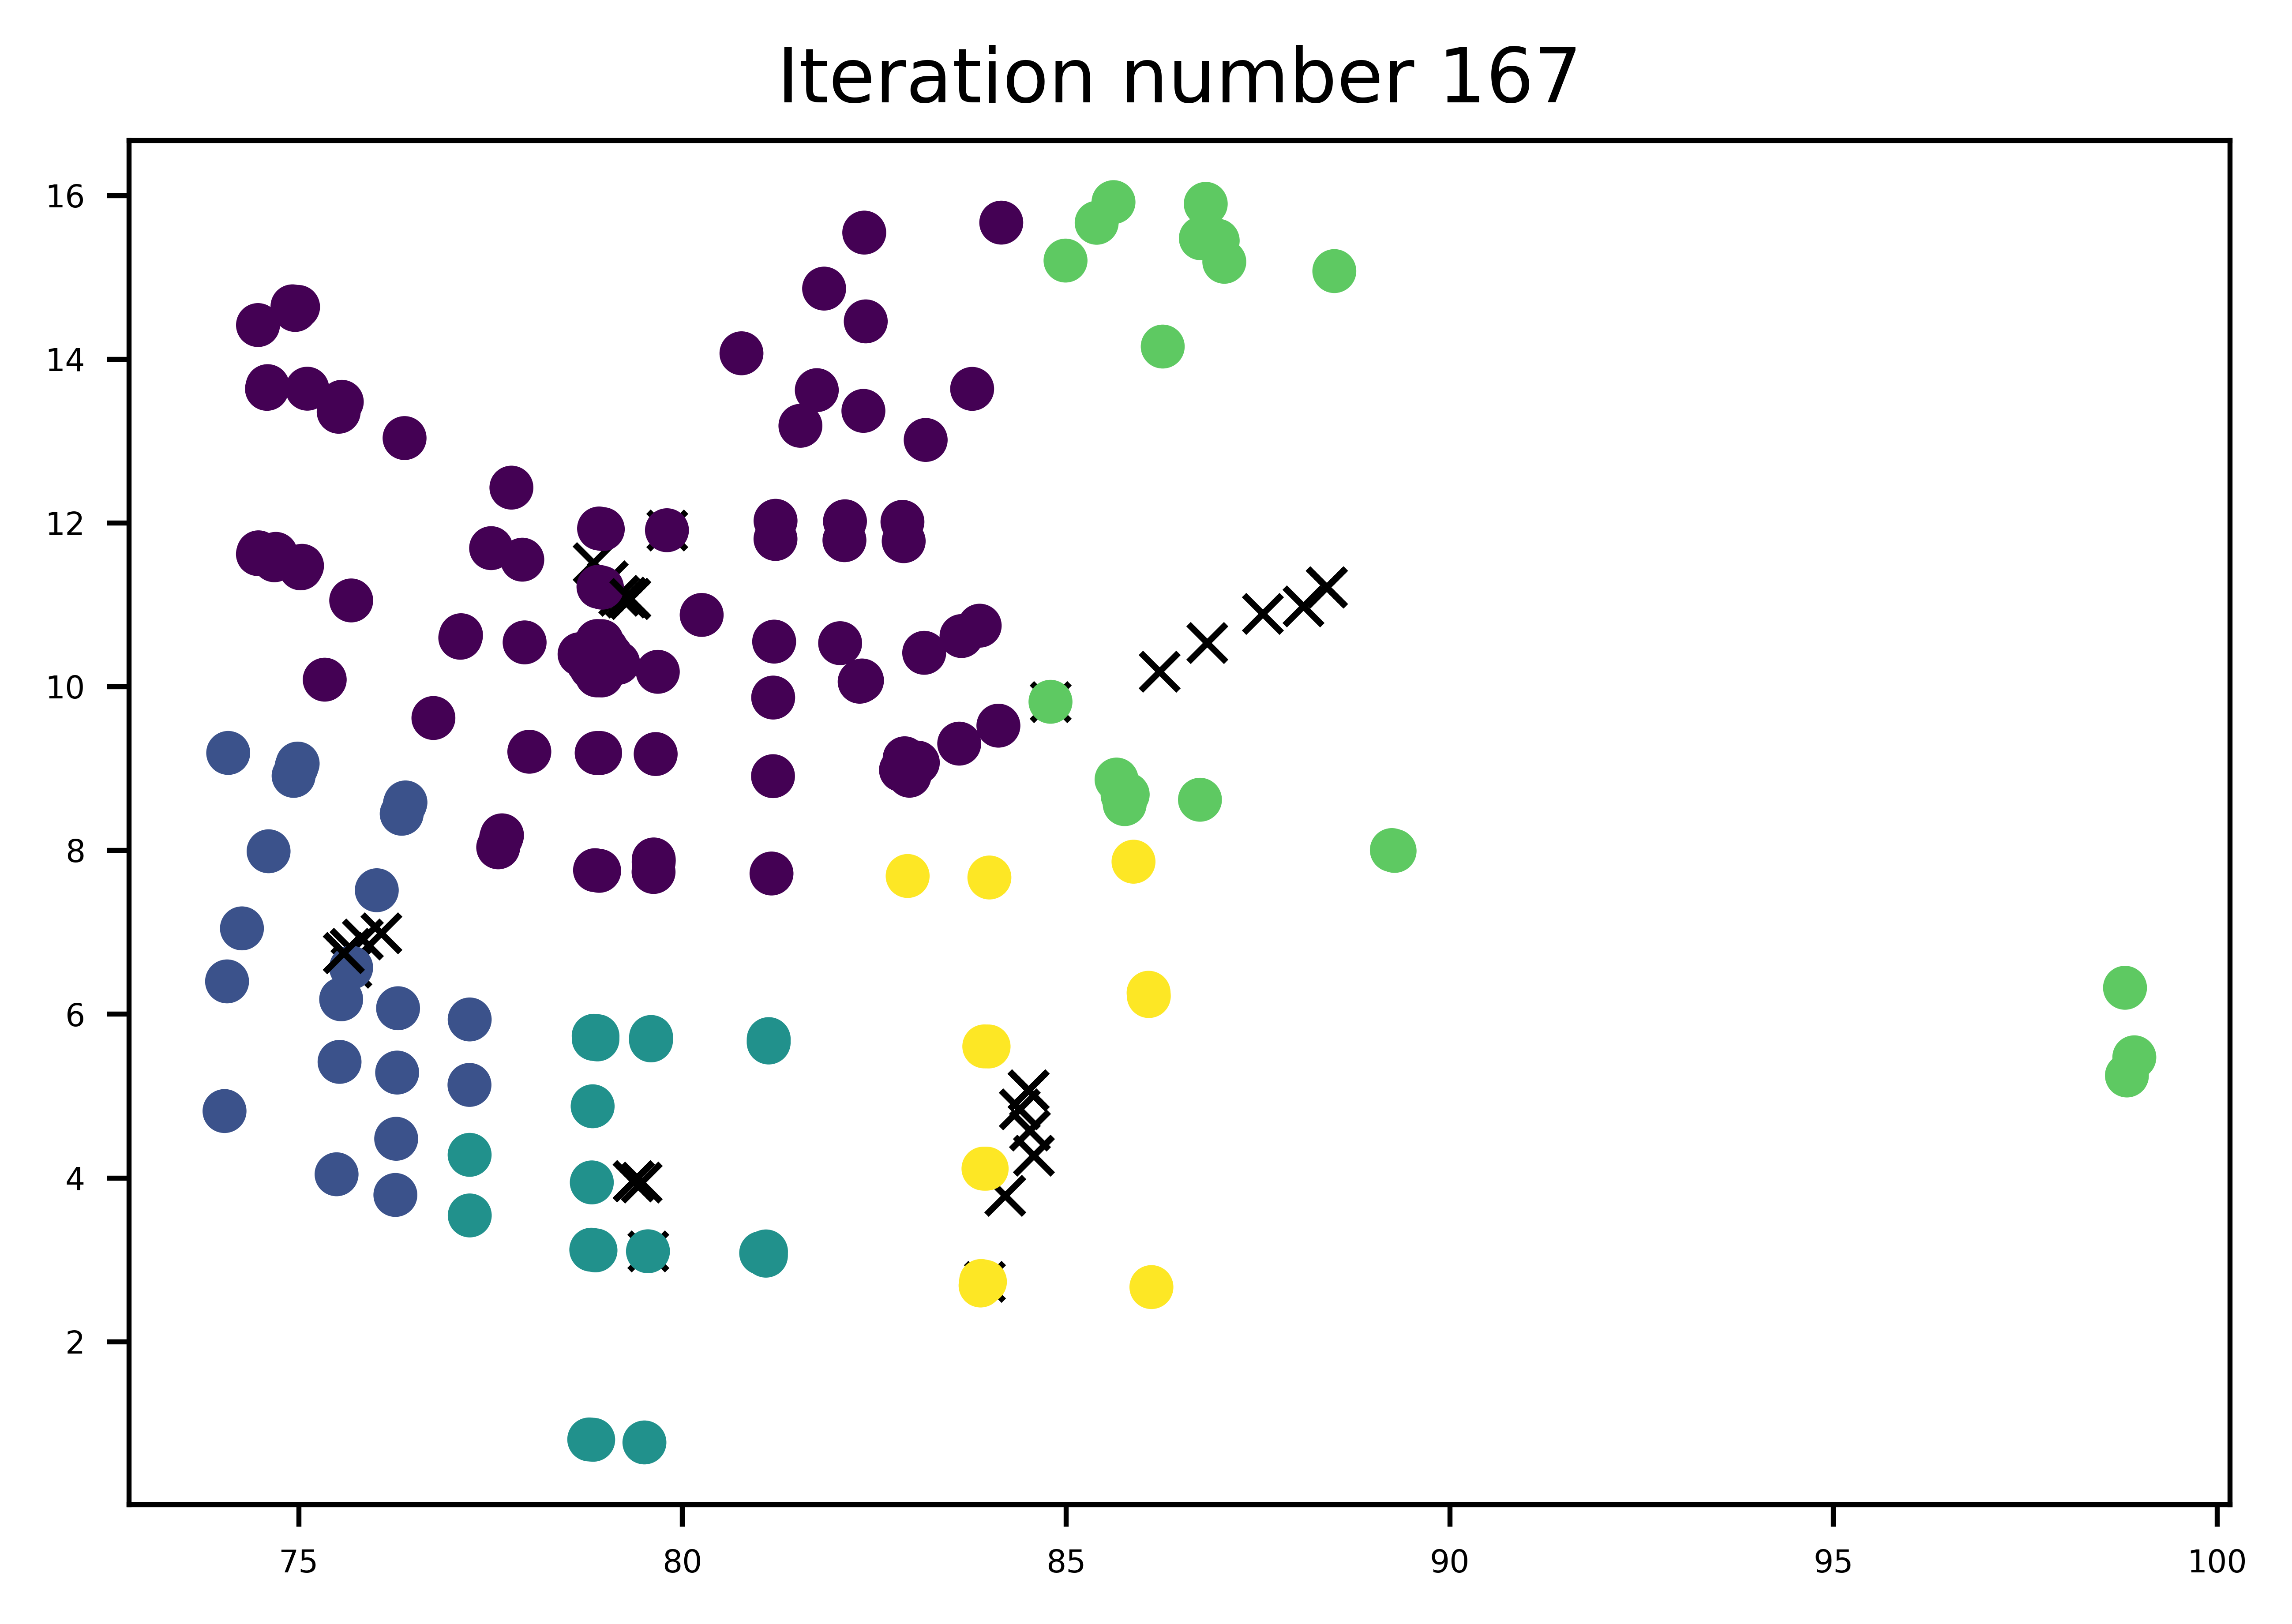

In [ ]:
K_blue=5
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
blue_centorid, blue_idx = kMeans(blue[:,1:3],K_blue,choose='blue')
plt.show()